# ANTsPy Tutorial

In this tutorial, I will show of some of the core ANTsPy functionality. I will highlight the similarities with ANTsR.

## Basic IO, Processing, & Plotting

In [1]:
import ants
import matplotlib.pyplot as plt
%matplotlib inline

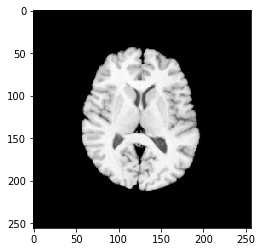

In [7]:
img = ants.image_read( ants.get_ants_data('r16'), 'float' )
plt.imshow(img.numpy(), cmap='Greys_r')
plt.show()

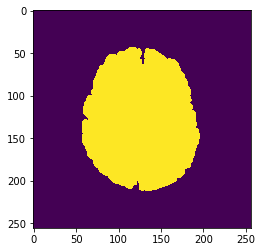

In [8]:
mask = ants.get_mask(img)
plt.imshow(mask.numpy())
plt.show()


# N4 Bias Correction

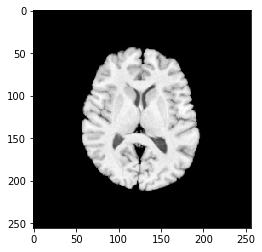

In [10]:
img_n4 = ants.n4_bias_field_correction(img, shrink_factor=3)

plt.imshow(img_n4.numpy(), cmap='Greys_r')
plt.show()

### Overloaded Mathematical Operators

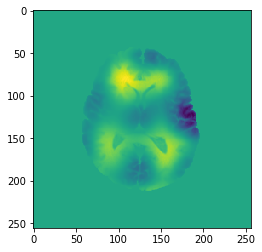

In [12]:
diff = img - img_n4
plt.imshow(diff.numpy())
plt.show()

# Atropos

The following example has been validated with ANTsR. That is, both ANTsR and ANTsPy return the EXACT same result (images).

R Version:
```R
img <- antsImageRead( getANTsRData("r16") , 2 )
img <- resampleImage( img, c(64,64), 1, 0 )
mask <- getMask(img)
segs1 <- atropos( a = img, m = '[0.2,1x1]',
   c = '[2,0]',  i = 'kmeans[3]', x = mask )
```

In [20]:
img = ants.image_read( ants.get_ants_data("r16") ).clone('float')
img = ants.resample_image( img, (64,64), 1, 0 )
mask = ants.get_mask(img)
segs1 = ants.atropos( a = img, m = '[0.2,1x1]', 
                     c = '[2,0]',  i = 'kmeans[3]', x = mask )

print(segs1)

{'segmentation': <ants.core.io.ANTsImage object at 0x11840f400>, 'probabilityimages': [<ants.core.io.ANTsImage object at 0x118797710>, <ants.core.io.ANTsImage object at 0x118479390>, <ants.core.io.ANTsImage object at 0x11840f9e8>]}


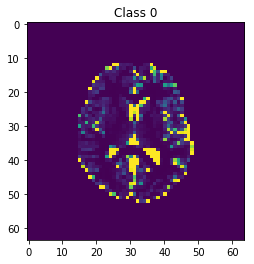

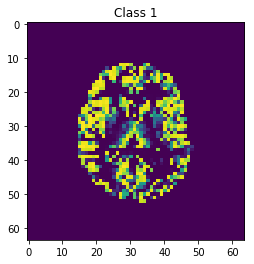

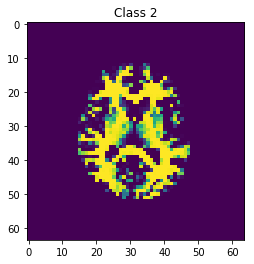

In [21]:
for i in range(3):
    plt.imshow(segs1['probabilityimages'][i].numpy())
    plt.title('Class %i' % i)
    plt.show()

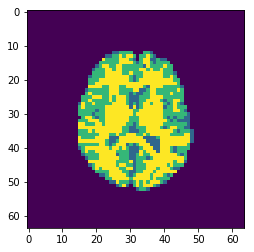

In [22]:
plt.imshow(segs1['segmentation'].numpy())
plt.show()

# Registration

R Version:
```R
fi <- antsImageRead(getANTsRData("r16") )
mi <- antsImageRead(getANTsRData("r64") )
fi<-resampleImage(fi,c(60,60),1,0)
mi<-resampleImage(mi,c(60,60),1,0) # speed up
mytx <- antsRegistration(fixed=fi, moving=mi, typeofTransform = c('SyN') )
```

In [23]:
fi = ants.image_read( ants.get_ants_data('r16') ).clone('float')
mi = ants.image_read( ants.get_ants_data('r64')).clone('float')
fi = ants.resample_image(fi,(60,60),1,0)
mi = ants.resample_image(mi,(60,60),1,0)
mytx = ants.registration(fixed=fi, moving=mi, 
                         type_of_transform = 'SyN' )

print(mytx)

{'warpedmovout': <ants.core.io.ANTsImage object at 0x118123fd0>, 'warpedfixout': <ants.core.io.ANTsImage object at 0x1181234e0>, 'fwdtransforms': ['/var/folders/__/v7ryn14n0x749jd36ttj_s380000gp/T/tmphqe1sm5v1Warp.nii.gz', '/var/folders/__/v7ryn14n0x749jd36ttj_s380000gp/T/tmphqe1sm5v0GenericAffine.mat'], 'invtransforms': ['/var/folders/__/v7ryn14n0x749jd36ttj_s380000gp/T/tmphqe1sm5v0GenericAffine.mat', '/var/folders/__/v7ryn14n0x749jd36ttj_s380000gp/T/tmphqe1sm5v1InverseWarp.nii.gz']}


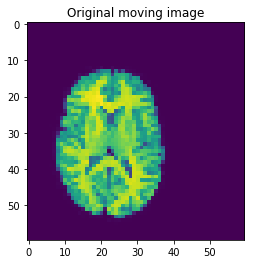

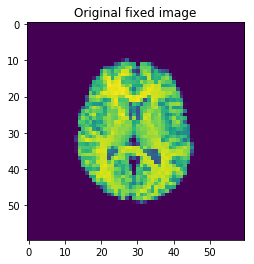

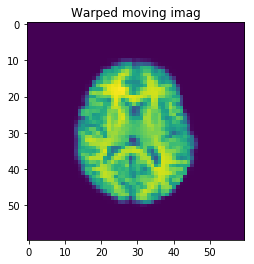

In [26]:
plt.imshow(mi.numpy())
plt.title('Original moving image')
plt.show()

plt.imshow(fi.numpy())
plt.title('Original fixed image')
plt.show()

plt.imshow(mytx['warpedmovout'].numpy())
plt.title('Warped moving imag')
plt.show()

# SparseDecom2

Another ANTsR-validated result:

```R
mat<-replicate(100, rnorm(20))
mat2<-replicate(100, rnorm(20))
mat<-scale(mat)
mat2<-scale(mat2)
mydecom<-sparseDecom2(inmatrix = list(mat,mat2), sparseness=c(0.1,0.3), nvecs=3, its=3, perms=0)
```
The 3 correlation values from that experiment are: [0.9762784, 0.9705170, 0.7937968]

After saving those exact matrices, and running the ANTsPy version, we see that we get the exact same result 

In [45]:
import numpy as np
import pandas as pd

mat = pd.read_csv('~/desktop/mat.csv', index_col=0).values
mat2 = pd.read_csv('~/desktop/mat2.csv', index_col=0).values


mydecom = ants.sparseDecom2(inmatrix=(mat,mat2), sparseness=(0.1,0.3), 
                            nvecs=3, its=3, perms=0)

print('Available Results: ', list(mydecom.keys()))
print('Correlations: ', mydecom['corrs'])

Available Results:  ['projections', 'projections2', 'eig1', 'eig2', 'corrs']
Correlations:  [ 0.97627841  0.97051702  0.79379676]
